Sanity Check
--

Fit some approximations to a model with a *Gaussian* likelihood. Make sure they're all the same. 

In [1]:
import GPflow
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

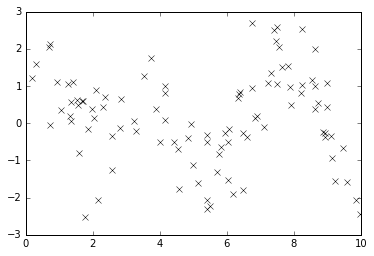

In [20]:
X = np.random.rand(100,1)*10
Y = np.sin(X) + 0.9 * np.cos(X*1.6) + np.random.randn(*X.shape)* 0.8
plt.plot(X, Y, 'kx')

In [21]:
m1 = GPflow.gpr.GPR(X, Y, kern=GPflow.kernels.RBF(1))
m2 = GPflow.vgp.VGP(X, Y, GPflow.kernels.RBF(1), likelihood=GPflow.likelihoods.Gaussian())
m3 = GPflow.svgp.SVGP(X, Y, GPflow.kernels.RBF(1)+GPflow.kernels.White(1), likelihood=GPflow.likelihoods.Gaussian(), Z=X.copy(), q_diag=False)
m3.Z.fixed = True
m4 = GPflow.svgp.SVGP(X, Y, GPflow.kernels.RBF(1)+GPflow.kernels.White(1), likelihood=GPflow.likelihoods.Gaussian(), Z=X.copy(), q_diag=False, whiten=True)
m4.Z.fixed=True

In [22]:
m1.optimize()
m2.optimize()
m3.optimize()
m4.optimize()

compiling tensorflow function...
done
optimization terminated, setting model state
compiling tensorflow function...
done
optimization terminated, setting model state
compiling tensorflow function...
done
optimization terminated, setting model state
compiling tensorflow function...
done
optimization terminated, setting model state


   status: 1
  success: False
     nfev: 1102
 hess_inv: <10104x10104 LbfgsInvHessProduct with dtype=float64>
      fun: 119.18021738586913
        x: array([  0.81523072,   0.        ,   0.        , ...,  13.31781222,
         1.0505465 ,  -0.15610825])
  message: 'STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT'
      jac: array([ 0.05007851, -0.        , -0.        , ..., -0.00212331,
       -0.18769256, -0.08749228])
      nit: 1001

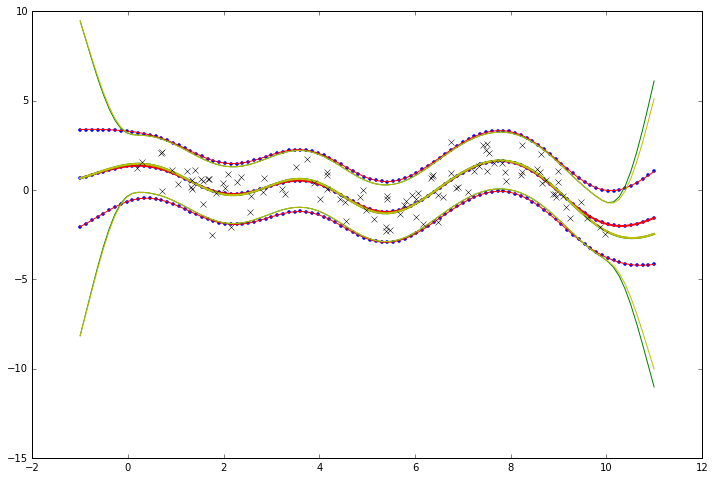

In [28]:
xx = np.linspace(-1, 11, 100)[:,None]


def plot(m, color='b'):
    mu, var = m.predict_y(xx)
    plt.plot(xx, mu, color, lw=2)
    plt.plot(xx, mu+ 2*np.sqrt(var), color, xx, mu-2*np.sqrt(var), color, lw=1)

plt.figure(figsize=(12,8))
plot(m1, 'b.')
plot(m2, 'r')
plot(m3, 'g')
plot(m4, 'y')
plt.plot(X, Y, 'kx')

In [24]:
m1.kern

Name,values,prior,constriant
kern.variance,[ 1.72053685],None,+ve
kern.lengthscales,[ 1.15769098],None,+ve


In [25]:
m2.kern

Name,values,prior,constriant
kern.variance,[ 1.72260728],None,+ve
kern.lengthscales,[ 1.15880219],None,+ve


In [26]:
m3.kern

Name,values,prior,constriant
kern.k1.lengthscales,[ 1.35048796],None,+ve
kern.k1.variance,[ 14.26113456],None,+ve
kern.k2.variance,[ 0.00973763],None,+ve


In [27]:
m4.kern

Name,values,prior,constriant
kern.k2.variance,[ 0.00989401],None,+ve
kern.k1.variance,[ 13.31781386],None,+ve
kern.k1.lengthscales,[ 1.35046334],None,+ve


In [29]:
print -m1._objective(m1.get_free_state())[0]
print -m2._objective(m2.get_free_state())[0]
print -m3._objective(m3.get_free_state())[0]
print -m4._objective(m4.get_free_state())[0]

-134.983958906
[-134.98497172]
-119.118533893
-119.180217386


In [67]:
m3.kern.k1.variance = 0.70
m3.kern.k1.lengthscales = 0.113
m3.kern.k1.variance.fixed = True
m3.kern.k1.lengthscales.fixed = True
m3.optimize()

compiling tensorflow function...
done
optimization terminated, setting model state


   status: 1
  success: False
     nfev: 1023
 hess_inv: <10102x10102 LbfgsInvHessProduct with dtype=float64>
      fun: 118.74237604241998
        x: array([-0.80225622,  0.27869984,  1.81168644, ...,  0.02559391,
       -0.06500598,  1.00003821])
  message: 'STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT'
      jac: array([ -3.15826681e-03,   2.28751108e-03,   1.69989014e-03, ...,
         1.91956668e-06,  -5.67338187e-06,   1.47052033e-04])
      nit: 1001

In [68]:
print -m3._objective(m3.get_free_state())[0]

-118.742376042


In [69]:
m3.kern

Name,values,prior,constriant
kern.k1.variance,[ 0.7],None,[FIXED]
kern.k1.lengthscales,[ 0.113],None,[FIXED]
kern.k2.variance,[ 0.00016559],None,+ve


In [62]:
m3

Name,values,prior,constriant
model.q_mu,[[ -2.16944296e-01] [ 1.14657535e-01] [ 6.39521410e-01] [ 3.09166338e-02] [ -8.35924558e-02] [ -2.44717928e-01] [ 2.15514531e-01] [ 5.02550738e-01] [ -1.24646145e-02] [ -2.39997746e-02] [ 9.24060509e-02] [ -9.72206488e-02] [ -2.35655271e-01] [ -3.59781769e-02] [ 1.52827915e-01] [ 1.10087209e-01] [ -2.44918370e-02] [ -4.00467504e-02] [ 6.62470606e-02] [ 7.64329768e-02] [ -2.07879205e-02] [ 1.57821724e-03] [ 3.06626672e-02] [ -2.64630155e-02] [ 5.36072742e-03] [ 2.94434958e-03] [ 3.48398528e-02] [ -2.00892768e-02] [ -2.30413612e-02] [ -5.83305714e-02] [ 1.52013529e-03] [ -1.90302736e-02] [ 4.29012864e-02] [ -8.23148869e-02] [ 6.11511375e-02] [ -2.90181056e-02] [ -4.15978692e-03] [ -7.56724990e-02] [ -5.74043192e-03] [ 4.74394952e-02] [ 3.23338004e-02] [ -3.29811552e-02] [ -1.62422848e-02] [ 3.06547194e-01] [ -3.38402338e-02] [ -5.79547964e-02] [ 2.92150660e-02] [ -2.82971325e-03] [ -2.86261532e-02] [ 1.09019969e-02] [ -1.64703977e-04] [ 1.29050269e-03] [ -4.66845077e-02] [ 4.61707878e-03] [ 2.07307172e-02] [ -4.06695064e-02] [ -3.80995068e-02] [ -6.26743242e-04] [ -1.61247719e-02] [ 3.24892761e-02] [ -4.11129404e-02] [ -6.04707993e-02] [ 2.02809657e-02] [ 1.76069848e-02] [ 2.17988040e-02] [ 9.97221481e-03] [ 7.14189301e-03] [ -1.24688474e-02] [ 1.10988490e-02] [ -2.34953009e-02] [ -2.53133799e-02] [ 1.34125430e-02] [ 1.30441798e-02] [ -4.69400411e-03] [ 1.10575745e-02] [ -1.70203871e-02] [ -3.40387533e-02] [ -2.16492196e-03] [ 7.45189424e-03] [ 1.35056389e-02] [ -3.94050038e-03] [ -2.43803112e-02] [ 2.03008451e-02] [ 1.53715338e-03] [ 8.81147971e-04] [ -3.93991855e-02] [ 2.35875309e-02] [ -8.26497586e-03] [ -1.20794203e-02] [ 7.68453234e-02] [ 4.56174112e-02] [ -2.19321899e-02] [ -2.65807212e-02] [ 3.06510975e-02] [ 1.57499336e-02] [ -2.34709226e-02] [ 2.69331886e-02] [ -6.96116547e-03] [ 3.23422521e-02] [ -1.88306073e-02]],None,(none)
model.kern.k1.variance,[ 12.53327161],None,+ve
model.kern.k1.lengthscales,[ 0.14018325],None,+ve
model.kern.k2.variance,[ 0.00715216],None,+ve
model.likelihood.variance,[ 0.58264098],None,+ve
model.Z,[[ 0.67186897] [ 0.4337761 ] [ 0.7424615 ] [ 0.31563685] [ 0.81688283] [ 0.88295167] [ 0.08521474] [ 0.37938436] [ 0.71402167] [ 0.94298382] [ 0.37794514] [ 0.20583819] [ 0.50783177] [ 0.76437234] [ 0.01155209] [ 0.83498415] [ 0.32876793] [ 0.49982299] [ 0.04967115] [ 0.82740707] [ 0.33383569] [ 0.01301634] [ 0.28199786] [ 0.08639044] [ 0.07528031] [ 0.36949374] [ 0.68622875] [ 0.34219988] [ 0.08861767] [ 0.75236116] [ 0.85734224] [ 0.49441483] [ 0.03867093] [ 0.87995696] [ 0.81807973] [ 0.00460334] [ 0.70297331] [ 0.93019187] [ 0.35968158] [ 0.45519356] [ 0.68625807] [ 0.09996571] [ 0.33506869] [ 0.98823506] [ 0.1590864 ] [ 0.96110396] [ 0.26215835] [ 0.08562683] [ 0.12915078] [ 0.07160528] [ 0.61294752] [ 0.01380417] [ 0.75890385] [ 0.61890268] [ 0.20925912] [ 0.91730512] [ 0.92122886] [ 0.70941041] [ 0.33177381] [ 0.83263788] [ 0.76316984] [ 0.56742949] [ 0.24127461] [ 0.97691876] [ 0.88491063] [ 0.70020615] [ 0.36952555] [ 0.33666056] [ 0.21352265] [ 0.78289267] [ 0.50540189] [ 0.88851826] [ 0.0655195 ] [ 0.35267469] [ 0.06626164] [ 0.78641794] [ 0.51999373] [ 0.08611 ] [ 0.26983038] [ 0.61612255] [ 0.71177859] [ 0.91216162] [ 0.38713124] [ 0.01547238] [ 0.80237114] [ 0.92606766] [ 0.97916413] [ 0.49906978] [ 0.32279393] [ 0.99373719] [ 0.99278864] [ 0.51427785] [ 0.75820568] [ 0.8715684 ] [ 0.98730372] [ 0.75995437] [ 0.46425193] [ 0.3482404 ] [ 0.42314239] [ 0.97474594]],None,[FIXED]
model.q_sqrt,"[[[ 0.86155014] [ 0. ] [ 0. ] ..., [ 0. ] [ 0. ] [ 0. ]] [[-0.19131462] [ 0.8606111 ] [ 0. ] ..., [ 0. ] [ 0. ] [ 0. ]] [[-1.66253711] [ 0.32858748] [ 0.94979276] ..., [ 0. ] [ 0. ] [ 0. ]] ..., [[ 0.04864425] [ 0.05660973] [-0.05194989] ..., [ 0.99957365] [ 0. ] [ 0. ]] [[-0.63637021] [-8.2490392 ] [-0.13601984] ..., [-0.18847308] [ 0.99883937] [ 0. ]] [[ 1.17839071] [-0.05233765] [-0.60666678] ..., [-0.01284577] [ 0.03039685] [ 0.99925306]]]",None,(none)


In [65]:
m3.kern.k1.fixed = True

In [66]:
m3._needs_recompile

False